<a href="https://colab.research.google.com/github/jinyjib98/AI_Sprint_Project/blob/main/%5B1%EC%B0%A8%5D_N421a_Count_based_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [1]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [2]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')

In [3]:
df.head()

,Unnamed: 0,title,company,description,url
0,0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
2,2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
3,3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
4,4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...


In [4]:
# title, company, description column만 남기고 나머지 제거
df = df.iloc[:, 1:4]
df.head()

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...


In [5]:
# 중복값 개수 확인
df.duplicated().sum()

543

In [6]:
# 중복값 제거
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
# reset index
df.reset_index(drop=True, inplace=True)

In [8]:
df.head()

,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."


In [9]:
df.shape

(757, 3)

### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [10]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [14]:
# uppercase to lowercase func
def to_lower(df):
    for column in df.columns.tolist():
        df[column] = df[column].apply(lambda x: x.lower())
    return df

In [15]:
to_lower(df)

,title,company,description
0,data scientist (structured products),equitrust life insurance company,job details\ndescription\nessential duties and...
1,"specialist, data science",nationwide,as a team member in the finance and internal a...
2,sr. data scientist (remote),american credit acceptance,overview:\namerican credit acceptance seeks a ...
3,data scientist associate sr (dads06) btb - leg...,"jpmorgan chase bank, n.a.",j.p. morgan's corporate & investment bank (cib...
4,data scientist,vystar credit union,"at vystar, we offer competitive pay, an excell..."
...,...,...,...
752,senior data analyst,intuit,our expert delivery & business intelligence te...
753,"senior / data scientist, advertising business",spotify,"music for everyone, no credit card needed. it’..."
754,senior data & applied scientist,microsoft,senior data & applied scientist\ndo you have a...
755,senior data scientist,ebay inc.,ebay is a global commerce leader that allows y...


In [22]:
regex = r"[^a-z0-9\s]"

subst = ""

def tokenize(text):
    tokens = re.sub(regex, subst, text)

    tokens = tokens.split()

    return tokens

df['tokens'] = df['description'].apply(tokenize)

df.tail(1)

,title,company,description,tokens
756,senior data scientist,spring discovery,tl;dr\nspring is accelerating the discovery of...,"[tldr, spring, is, accelerating, the, discover..."


### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [26]:
from collections import Counter

word_num = Counter()

df['tokens'].apply(lambda x: word_num.update(x))

print(f'top 10 words:\n')
word_num.most_common(10)

top 10 words:



[('and', 21864),
 ('to', 12694),
 ('the', 10538),
 ('of', 8839),
 ('data', 7425),
 ('in', 6769),
 ('a', 6436),
 ('with', 5727),
 ('for', 4132),
 ('or', 3812)]

In [31]:
def counting_word(docs):
    
    # 전체 말뭉치에서 단어 빈도 카운트
    word_num = Counter()

    # 문서 내에서 단어 개수만큼 +1: 존재 문서 수
    word_in_docs = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_num.update(doc)
        word_in_docs.update(set(doc))

    temp = zip(word_num.keys(), word_num.values())

    wc = pd.DataFrame(temp, columns=['word', 'count'])

    # 단어 순위
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    # 전체에서 단어 비율
    total = wc['count'].sum()
    wc['percent'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank') # 빼버리면 누적 비율 계산 이상해짐...

    # 누적 비율
    wc['cum_percent'] = wc['percent'].cumsum()

    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])

    wc = ac.merge(wc, on='word')

    # 전체 문서에서 존재하는 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank') # rank 높은 순으로 정렬

In [32]:
wc = counting_word(df['tokens'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cum_percent,word_in_docs_percent
16,and,755,21864,1.0,0.056456,0.056456,0.997358
200,to,754,12694,2.0,0.032778,0.089233,0.996037
106,the,745,10538,3.0,0.027210,0.116444,0.984148
117,of,745,8839,4.0,0.022823,0.139267,0.984148
34,data,740,7425,5.0,0.019172,0.158440,0.977543
7,in,748,6769,6.0,0.017478,0.175918,0.988111
80,a,739,6436,7.0,0.016619,0.192537,0.976222
123,with,742,5727,8.0,0.014788,0.207324,0.980185
348,for,727,4132,9.0,0.010669,0.217994,0.960370
186,or,708,3812,10.0,0.009843,0.227837,0.935271


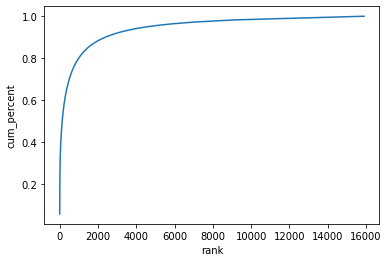

In [33]:
import seaborn as sns

sns.lineplot(x='rank', y='cum_percent', data=wc);

In [34]:
pip install squarify

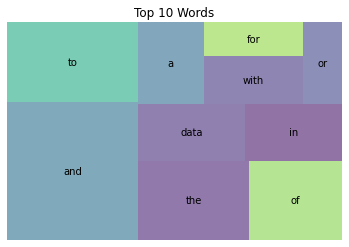

In [37]:
import squarify

wc_top10 = wc[wc['rank'] <=10]

squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6)
plt.axis('off')
plt.title('Top 10 Words')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [40]:
STOP_WORDS = nlp.Defaults.stop_words.union(['data', 'work', '\n', '\n\n']) # '\n', '\n\n'은 제거하라는 말은 없었지만, 단순 띄어쓰기 의미하므로 삭제

tokens = []

for doc in tokenizer.pipe(df['description']):
    doc_tokens = []

    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [42]:
wc_after = counting_word(df['tokens'])
wc_after.head(10)

,word,word_in_docs,count,rank,percent,cum_percent,word_in_docs_percent
64,experience,687,3055,1.0,0.012447,0.012447,0.907530
603,business,518,1885,2.0,0.007680,0.020128,0.684280
141,team,548,1323,3.0,0.005390,0.025518,0.723910
231,learning,467,1193,4.0,0.004861,0.030379,0.616909
230,machine,468,1140,5.0,0.004645,0.035024,0.618230
823,science,460,1048,6.0,0.004270,0.039294,0.607662
129,ability,452,958,7.0,0.003903,0.043197,0.597094
181,analysis,436,896,8.0,0.003651,0.046848,0.575958
332,statistical,409,890,9.0,0.003626,0.050474,0.540291
155,skills,466,886,10.0,0.003610,0.054084,0.615588


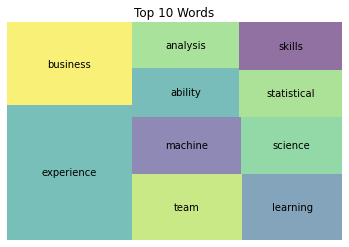

In [43]:
wc_after_top10 = wc_after[wc_after['rank'] <=10]

squarify.plot(sizes=wc_after_top10['percent'], label=wc_after_top10['word'], alpha=0.6)
plt.axis('off')
plt.title('Top 10 Words')
plt.show()

### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [51]:
def get_lemmas(text):

    lemmas = []

    doc = nlp(text)

    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
    
    return lemmas

In [52]:
df['lemmas'] = df['description'].apply(get_lemmas)
df.head()

,title,company,description,tokens,lemmas
0,data scientist (structured products),equitrust life insurance company,job details\ndescription\nessential duties and...,"[job, details, description, essential, duties,...","[job, detail, description, essential, duty, re..."
1,"specialist, data science",nationwide,as a team member in the finance and internal a...,"[team, member, finance, internal, audit, depar...","[team, member, finance, internal, audit, depar..."
2,sr. data scientist (remote),american credit acceptance,overview:\namerican credit acceptance seeks a ...,"[overview:, american, credit, acceptance, seek...","[overview, american, credit, acceptance, seek,..."
3,data scientist associate sr (dads06) btb - leg...,"jpmorgan chase bank, n.a.",j.p. morgan's corporate & investment bank (cib...,"[j.p., morgan's, corporate, &, investment, ban...","[j.p, morgan, corporate, investment, bank, cib..."
4,data scientist,vystar credit union,"at vystar, we offer competitive pay, an excell...","[vystar,, offer, competitive, pay,, excellent,...","[vystar, offer, competitive, pay, excellent, b..."


In [53]:
wc_lemmas = counting_word(df['lemmas'])
wc_lemmas.head(10)

,word,word_in_docs,count,rank,percent,cum_percent,word_in_docs_percent
60,experience,710,3666,1.0,0.014929,0.014929,0.937913
129,team,637,2336,2.0,0.009513,0.024441,0.841480
466,business,545,2193,3.0,0.008930,0.033372,0.719947
134,science,619,1736,4.0,0.007069,0.040441,0.817701
161,analysis,544,1609,5.0,0.006552,0.046993,0.718626
59,model,528,1476,6.0,0.006011,0.053004,0.697490
382,analytic,460,1409,7.0,0.005738,0.058742,0.607662
19,skill,560,1333,8.0,0.005428,0.064170,0.739762
202,learning,489,1318,9.0,0.005367,0.069537,0.645971
127,product,449,1305,10.0,0.005314,0.074852,0.593131


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 7) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

In [58]:
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

In [59]:
tfidf = TfidfVectorizer(stop_words='english', tokenizer=tokenize, max_features=3000)

dtm_tfidf = tfidf.fit_transform(df['description'])

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

,aa,aav,ab,ability,able,abreast,abstract,abuse,academia,academic,accelerate,accenture,accept,acceptable,acceptance,access,accessibility,accessible,accommodation,accomplish,accomplishment,accord,accordance,accordingly,account,accountability,accountable,accounting,accredit,accredited,accuracy,accurate,accurately,achieve,achievement,acquire,acquisition,acre,act,action,...,whip,wholly,wi,wide,widely,wild,wildlife,willing,willingness,win,wind,wireless,woman,word,work,workday,worker,workflow,workforce,working,workload,workplace,workshop,world,worldwide,wrangle,wrangling,wri,write,writing,year,yelp,yes,york,yrs,zero,zillow,zllius,zone,zulily
0,0.0,0.0,0.0,0.079809,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.080215,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.064603,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.072130,0.0,0.0,0.0,0.0,0.000000,0.098536,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.023817,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.072771,0.035877,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.035466,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.032254,0.028187,0.0,0.0,0.0,0.0,0.000000,0.146322,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.012595,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.018614,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.058439,0.000000,0.0,0.0,0.0,0.0,0.04325,0.000000,0.0,0.0,0.0,0.069666,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.060438,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.057721,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.051845,0.00000,0.017439,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.043256,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.029428,0.000000,0.0,0.0,0.044735,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.053861,0.000000,0.0,0.0,0.000000,0.039093,0.0,0.0,0.0,0.0,0.000000,0.010681,0.0,0.0,0.0,0.0386,0.000000,0.0,0.000000,0.0,0.104815,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.038725,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.020923,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.056367,0.021352,0.000000,0.0,0.0,0.000000,0.039691,0.028183,0.03024,0.0,0.000000,0.0,0.0,0.000000,0.028007,0.0,0.000000,0.0,0.029138,0.02703,0.0,0.0,0.069559,...,0.0,0.0,0.0,0.019540,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.028183,0.092997,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.02703,0.046829,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
753,0.0,0.0,0.0,0.019823,0.000000

In [60]:
model = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
model.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [62]:
model.kneighbors([dtm_tfidf.iloc[88]])

(array([[0.        , 1.08634141, 1.16778292, 1.18690361, 1.18773111]]),
 array([[ 88,  40, 121,  68, 715]]))

In [63]:
df['description'].iloc[[88, 40, 121, 68, 715]]

88     as a data engineer, you will build a solid dat...
40     as a part of the data science team, you will r...
121    cmts cognitive data scientist (joinoci)-20000k...
68     req #: jreq137021 – apply now!\nthomson reuter...
715    job description\nat levi strauss & co, we are ...
Name: description, dtype: object